# 案例2: 构建自己的多层感知机: MNIST 手写数字识别

### 本案例要求如下
- #### 实现SGD优化器 (`./optimizer.py`)
- #### 实现全连接层FCLayer前向和后向计算 (`layers/fc_layer.py`)
- #### 实现激活层SigmoidLayer前向和后向计算 (`layers/sigmoid_layer.py`)
- #### 实现激活层ReLULayer前向和后向计算 (`layers/relu_layer.py`)
- #### 实现损失层EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### 实现损失层SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## 读入MNIST数据集

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # 归一化处理
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # 将标签变为one-hot编码
    return tf.one_hot(label, depth=10)

In [4]:
# 数据预处理
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## 超参数设置

In [5]:
batch_size = 200
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. 使用欧式距离损失训练多层感知机(MLP with Euclidean Loss)
第一部分将使用欧式距离损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.
### TODO
执行以下代码之前，请完成 **./optimizer.py** 和 **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 使用欧式距离损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和Sigmoid激活函数.

### TODO
执行以下代码之前，请完成 **layers/fc_layer.py** 和 **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
This is a deprecated API that should only be used in TF 1 graph mode and legacy TF 2 graph mode available through `tf.compat.v1`. In all other situations -- namely, eager mode and inside `tf.function` -- you can consume dataset elements using `for elem in dataset: ...` or by explicitly creating iterator via `iterator = iter(dataset)` and fetching its elements via `values = next(iterator)`. Furthermore, this API is not available in TF 2. During the transition from TF 1 to TF 2 you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)` to create a TF 1 graph mode style iterator for a dataset created through TF 2 APIs. Note that this should be a transient state of your code base as there are in general no guarantees about the interoperability of TF 1 and TF 2 code.


2024-02-01 17:46:36.882865: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


Epoch [0][20]	 Batch [0][275]	 Training Loss 1122.5270	 Accuracy 0.0950
Epoch [0][20]	 Batch [50][275]	 Training Loss 313.7547	 Accuracy 0.1142
Epoch [0][20]	 Batch [100][275]	 Training Loss 254.6877	 Accuracy 0.1283
Epoch [0][20]	 Batch [150][275]	 Training Loss 234.2941	 Accuracy 0.1377
Epoch [0][20]	 Batch [200][275]	 Training Loss 223.9367	 Accuracy 0.1433
Epoch [0][20]	 Batch [250][275]	 Training Loss 217.5014	 Accuracy 0.1482

Epoch [0]	 Average training loss 215.1371	 Average training accuracy 0.1514
Epoch [0]	 Average validation loss 189.9076	 Average validation accuracy 0.1874

Epoch [1][20]	 Batch [0][275]	 Training Loss 190.4911	 Accuracy 0.1650
Epoch [1][20]	 Batch [50][275]	 Training Loss 190.0982	 Accuracy 0.1834
Epoch [1][20]	 Batch [100][275]	 Training Loss 189.7325	 Accuracy 0.1845
Epoch [1][20]	 Batch [150][275]	 Training Loss 189.3596	 Accuracy 0.1866
Epoch [1][20]	 Batch [200][275]	 Training Loss 189.0935	 Accuracy 0.1877
Epoch [1][20]	 Batch [250][275]	 Training Lo

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.3716.



## 1.2 使用欧式距离损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和ReLU激活函数.

### TODO
执行以下代码之前，请完成 **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# 使用FCLayer和ReLULayer构建多层感知机
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][275]	 Training Loss 1041.3591	 Accuracy 0.0800
Epoch [0][20]	 Batch [50][275]	 Training Loss 399.5950	 Accuracy 0.0753
Epoch [0][20]	 Batch [100][275]	 Training Loss 314.9175	 Accuracy 0.0924
Epoch [0][20]	 Batch [150][275]	 Training Loss 280.9609	 Accuracy 0.1016
Epoch [0][20]	 Batch [200][275]	 Training Loss 262.2994	 Accuracy 0.1094
Epoch [0][20]	 Batch [250][275]	 Training Loss 250.4113	 Accuracy 0.1172

Epoch [0]	 Average training loss 245.9971	 Average training accuracy 0.1203
Epoch [0]	 Average validation loss 197.9358	 Average validation accuracy 0.1636

Epoch [1][20]	 Batch [0][275]	 Training Loss 196.3055	 Accuracy 0.2250
Epoch [1][20]	 Batch [50][275]	 Training Loss 197.2740	 Accuracy 0.1786
Epoch [1][20]	 Batch [100][275]	 Training Loss 195.6494	 Accuracy 0.1862
Epoch [1][20]	 Batch [150][275]	 Training Loss 194.1332	 Accuracy 0.1917
Epoch [1][20]	 Batch [200][275]	 Training Loss 192.7982	 Accuracy 0.1963
Epoch [1][20]	 Batch [250][275]	 Training Lo

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7280.



## 绘制曲线

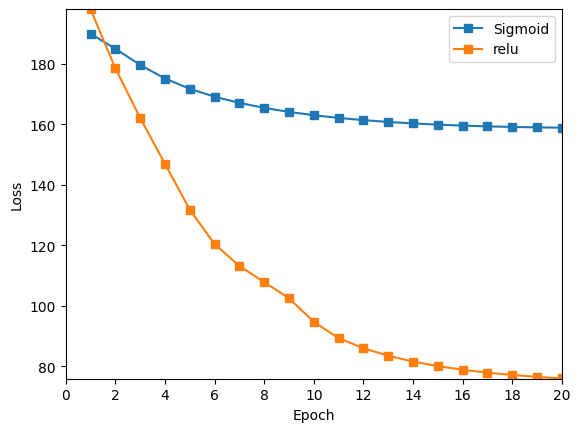

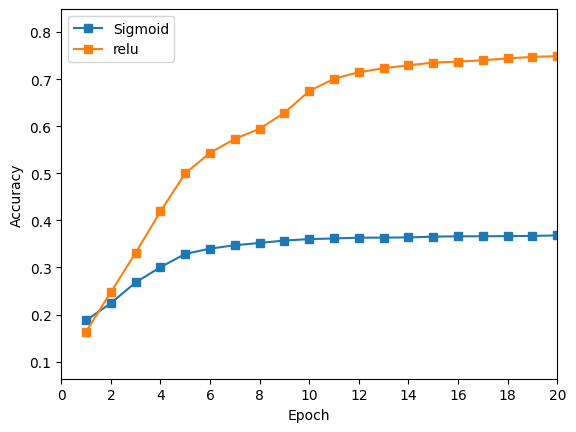

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. 使用Softmax交叉熵损失训练多层感知机(MLP with Softmax Cross-Entropy Loss)
第二部分将使用Softmax交叉熵损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.

### TODO
执行以下代码之前，请完成 **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 使用Softmax交叉熵损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和Sigmoid激活函数.

In [15]:
sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### 训练

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][275]	 Training Loss 2.4740	 Accuracy 0.1000
Epoch [0][20]	 Batch [50][275]	 Training Loss 2.0344	 Accuracy 0.2234
Epoch [0][20]	 Batch [100][275]	 Training Loss 2.0043	 Accuracy 0.2783
Epoch [0][20]	 Batch [150][275]	 Training Loss 1.8977	 Accuracy 0.3051
Epoch [0][20]	 Batch [200][275]	 Training Loss 1.6657	 Accuracy 0.3207
Epoch [0][20]	 Batch [250][275]	 Training Loss 1.7411	 Accuracy 0.3317

Epoch [0]	 Average training loss 1.6540	 Average training accuracy 0.3360
Epoch [0]	 Average validation loss 1.6540	 Average validation accuracy 0.3874

Epoch [1][20]	 Batch [0][275]	 Training Loss 1.7276	 Accuracy 0.3550
Epoch [1][20]	 Batch [50][275]	 Training Loss 1.6299	 Accuracy 0.3754
Epoch [1][20]	 Batch [100][275]	 Training Loss 1.7891	 Accuracy 0.3704
Epoch [1][20]	 Batch [150][275]	 Training Loss 1.7430	 Accuracy 0.3713
Epoch [1][20]	 Batch [200][275]	 Training Loss 1.5383	 Accuracy 0.3714
Epoch [1][20]	 Batch [250][275]	 Training Loss 1.6575	 Accuracy 0.3734


### 测试

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.3889.



## 2.2 使用Softmax交叉熵损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和ReLU激活函数.

In [18]:
reluMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][275]	 Training Loss 2.4145	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][275]	 Training Loss 0.9133	 Accuracy 0.5619
Epoch [0][20]	 Batch [100][275]	 Training Loss 0.7709	 Accuracy 0.6709
Epoch [0][20]	 Batch [150][275]	 Training Loss 0.5900	 Accuracy 0.7199
Epoch [0][20]	 Batch [200][275]	 Training Loss 0.2780	 Accuracy 0.7523
Epoch [0][20]	 Batch [250][275]	 Training Loss 0.2963	 Accuracy 0.7830

Epoch [0]	 Average training loss 0.1777	 Average training accuracy 0.7940
Epoch [0]	 Average validation loss 0.1777	 Average validation accuracy 0.9410

Epoch [1][20]	 Batch [0][275]	 Training Loss 0.3160	 Accuracy 0.9300
Epoch [1][20]	 Batch [50][275]	 Training Loss 0.2370	 Accuracy 0.9263
Epoch [1][20]	 Batch [100][275]	 Training Loss 0.3405	 Accuracy 0.9245
Epoch [1][20]	 Batch [150][275]	 Training Loss 0.3186	 Accuracy 0.9263
Epoch [1][20]	 Batch [200][275]	 Training Loss 0.1700	 Accuracy 0.9278
Epoch [1][20]	 Batch [250][275]	 Training Loss 0.1989	 Accuracy 0.9290


In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9754.



## 绘制曲线

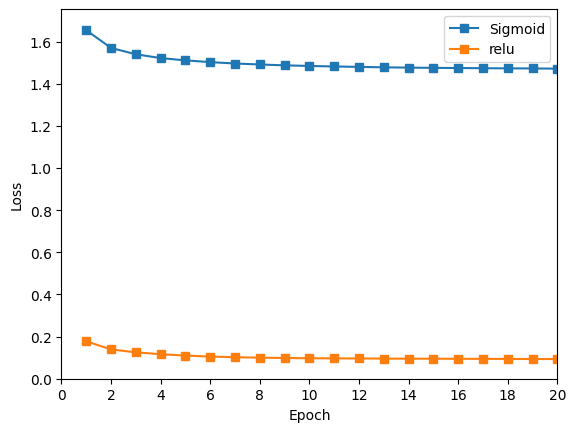

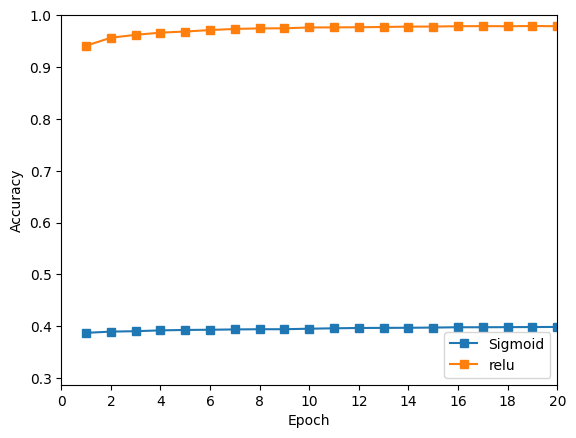

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 具有两层隐含层的多层感知机

接下来，根据案例要求，还需要完成**构造具有两个隐含层的多层感知机，自行选取合适的激活函数和损失函数，与只有一个隐含层的结果相比较**.

注意: 请在下方插入新的代码块，不要直接修改上面的代码.

In [22]:
from criterion import SoftmaxCrossEntropyLossLayer
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay)

ReLUSigMLP = Network()
ReLUSigMLP.add(FCLayer(784, 128))
ReLUSigMLP.add(ReLULayer())
ReLUSigMLP.add(FCLayer(128, 128))
ReLUSigMLP.add(SigmoidLayer())
ReLUSigMLP.add(FCLayer(128, 10))
ReLUSigMLP, ReLUSig_loss, ReLUSig_acc = train(ReLUSigMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
test(ReLUSigMLP, criterion, data_test, batch_size, disp_freq)


Epoch [0][20]	 Batch [0][275]	 Training Loss 2.7005	 Accuracy 0.1050
Epoch [0][20]	 Batch [50][275]	 Training Loss 2.2670	 Accuracy 0.1292
Epoch [0][20]	 Batch [100][275]	 Training Loss 2.1955	 Accuracy 0.1428
Epoch [0][20]	 Batch [150][275]	 Training Loss 2.1938	 Accuracy 0.1573
Epoch [0][20]	 Batch [200][275]	 Training Loss 2.0297	 Accuracy 0.1719
Epoch [0][20]	 Batch [250][275]	 Training Loss 1.8788	 Accuracy 0.1892

Epoch [0]	 Average training loss 1.7889	 Average training accuracy 0.1981
Epoch [0]	 Average validation loss 1.7889	 Average validation accuracy 0.2930

Epoch [1][20]	 Batch [0][275]	 Training Loss 1.9528	 Accuracy 0.2550
Epoch [1][20]	 Batch [50][275]	 Training Loss 1.8889	 Accuracy 0.2980
Epoch [1][20]	 Batch [100][275]	 Training Loss 1.8642	 Accuracy 0.3074
Epoch [1][20]	 Batch [150][275]	 Training Loss 1.9166	 Accuracy 0.3118
Epoch [1][20]	 Batch [200][275]	 Training Loss 1.8486	 Accuracy 0.3155
Epoch [1][20]	 Batch [250][275]	 Training Loss 1.7640	 Accuracy 0.3181


In [23]:
from criterion import SoftmaxCrossEntropyLossLayer
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay)

SigReLUMLP = Network()
SigReLUMLP.add(FCLayer(784, 128))
SigReLUMLP.add(ReLULayer())
SigReLUMLP.add(FCLayer(128, 128))
SigReLUMLP.add(SigmoidLayer())
SigReLUMLP.add(FCLayer(128, 10))
SigReLUMLP, SigReLU_loss, SigReLU_acc = train(SigReLUMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)
test(SigReLUMLP, criterion, data_test, batch_size, disp_freq)


Epoch [0][20]	 Batch [0][275]	 Training Loss 2.5172	 Accuracy 0.0650
Epoch [0][20]	 Batch [50][275]	 Training Loss 1.8008	 Accuracy 0.3302
Epoch [0][20]	 Batch [100][275]	 Training Loss 1.4177	 Accuracy 0.4345
Epoch [0][20]	 Batch [150][275]	 Training Loss 1.4181	 Accuracy 0.4906
Epoch [0][20]	 Batch [200][275]	 Training Loss 1.1353	 Accuracy 0.5243
Epoch [0][20]	 Batch [250][275]	 Training Loss 0.9543	 Accuracy 0.5497

Epoch [0]	 Average training loss 0.9941	 Average training accuracy 0.5596
Epoch [0]	 Average validation loss 0.9941	 Average validation accuracy 0.6944

Epoch [1][20]	 Batch [0][275]	 Training Loss 1.0837	 Accuracy 0.6850
Epoch [1][20]	 Batch [50][275]	 Training Loss 1.0611	 Accuracy 0.6820
Epoch [1][20]	 Batch [100][275]	 Training Loss 0.9524	 Accuracy 0.6891
Epoch [1][20]	 Batch [150][275]	 Training Loss 1.1125	 Accuracy 0.6915
Epoch [1][20]	 Batch [200][275]	 Training Loss 0.9541	 Accuracy 0.6940
Epoch [1][20]	 Batch [250][275]	 Training Loss 0.8072	 Accuracy 0.6963


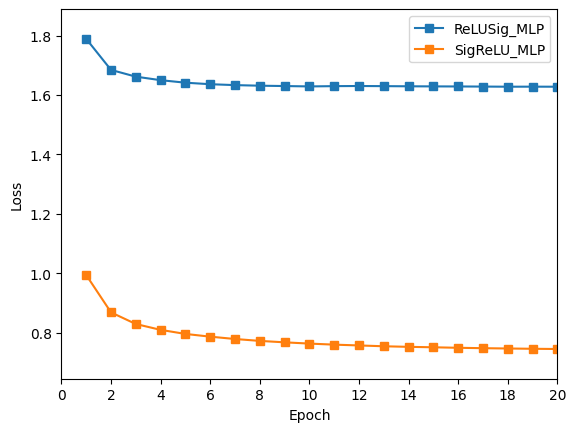

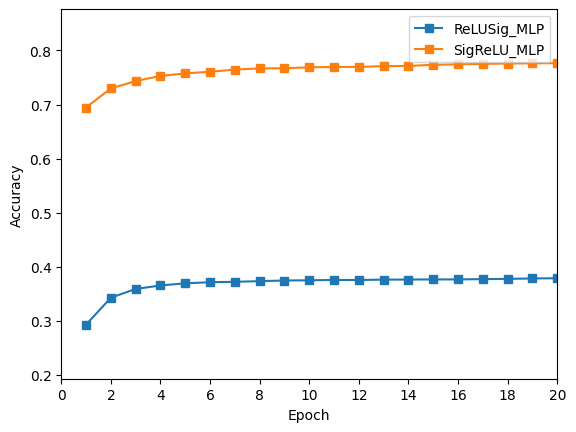

In [24]:
plot_loss_and_acc({'ReLUSig_MLP': [ReLUSig_loss, ReLUSig_acc],
                   'SigReLU_MLP': [SigReLU_loss, SigReLU_acc]})